In [27]:
pip install ecmwf-data ecmwf-opendata magpye

Note: you may need to restart the kernel to use updated packages.


In [2]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['10u', '10v']
filename = 'wind10.grib'
filename

'wind10.grib'

Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [5]:
stepS=[i for i in range(0, 144, 3)]

client.retrieve(
    date=-1,
    time=0,
    step=stepS,
    #stream="oper",
    type="fc",
    #levtype="sfc",
    param=parameters,
    target=filename
)

<multiple>:   0%|          | 0.00/55.8M [00:00<?, ?B/s]

In [7]:
data = ecdata.read(filename)

In [8]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20221114,0,"0,3,...",None,165,od,oper,fc,0001
10v,heightAboveGround,10,20221114,0,"0,3,...",None,166,od,oper,fc,0001


In [9]:
data.describe('10u')

shortName,10u
name,10 metre U wind component
paramId,165
units,m s**-1
typeOfLevel,heightAboveGround
level,10
date,20221114
time,0
step,"0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,123,126,129,132,135,138,141"
number,None
class,od


In [10]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,10u,heightAboveGround,10,20221114,0,0,fc,None,regular_ll
1,ecmf,10v,heightAboveGround,10,20221114,0,0,fc,None,regular_ll
2,ecmf,10u,heightAboveGround,10,20221114,0,3,fc,None,regular_ll
3,ecmf,10v,heightAboveGround,10,20221114,0,3,fc,None,regular_ll
4,ecmf,10u,heightAboveGround,10,20221114,0,6,fc,None,regular_ll
5,ecmf,10v,heightAboveGround,10,20221114,0,6,fc,None,regular_ll
6,ecmf,10v,heightAboveGround,10,20221114,0,9,fc,None,regular_ll
7,ecmf,10u,heightAboveGround,10,20221114,0,9,fc,None,regular_ll
8,ecmf,10u,heightAboveGround,10,20221114,0,12,fc,None,regular_ll


In [19]:
#t2m = data.select(shortName= "2t", step=12)
u = data.select(shortName= "10u", step=12)
v = data.select(shortName= "10v", step=12)

#t2m.describe()

parameter,typeOfLevel,level


We need to convert the temperature from Kelvin to Celsius

In [25]:
# t2m -= 273.15

And finally, we can plot the data on the map. 

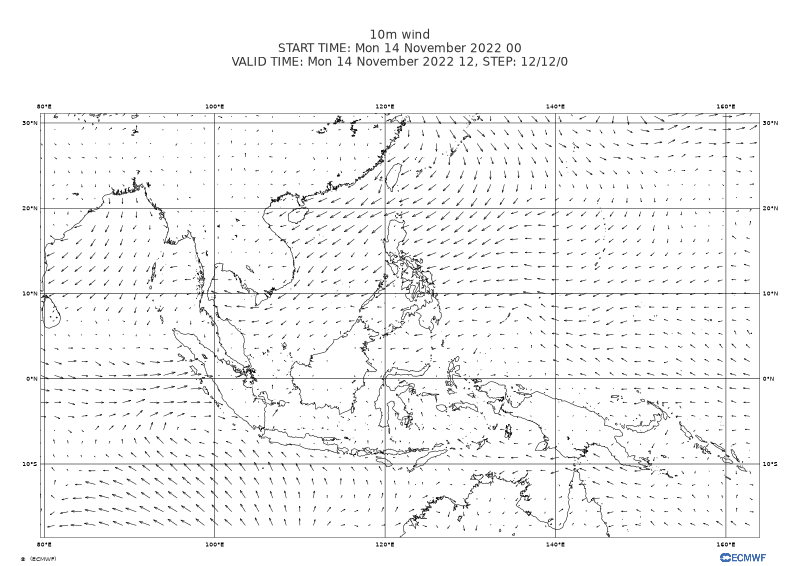

In [28]:
fig = GeoMap(area_name='south_east_asia_and_indonesia')

#fig.contour_shaded(t2m, style="temperature_rainbow_3")
fig.arrows(u=u, v=v, wind_style="arrows", density=2, colour='black')
fig.coastlines(resolution="high")
fig.gridlines()

fig.title(["10m wind",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=10u'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=10u' />, STEP: <grib_info key='step' where='shortName=10u'/>"])
fig.legend()
fig.footer("©  (ECMWF) ", logo='ecmwf')

fig.show()

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.4x0.4 resolution, while high resolution data is 0.1x0.1 grid.